In [245]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier,RandomForestClassifier,AdaBoostClassifier
from sklearn.metrics import confusion_matrix,recall_score,f1_score,classification_report,precision_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier

In [3]:
df=pd.read_csv('song_data.csv')

In [4]:
df.head()

song_name  song_popularity  song_duration_ms  \
0  Boulevard of Broken Dreams               73            262333   
1                  In The End               66            216933   
2           Seven Nation Army               76            231733   
3                  By The Way               74            216933   
4           How You Remind Me               56            223826   

   acousticness  danceability  energy  instrumentalness  key  liveness  \
0      0.005520         0.496   0.682          0.000029    8    0.0589   
1      0.010300         0.542   0.853          0.000000    3    0.1080   
2      0.008170         0.737   0.463          0.447000    0    0.2550   
3      0.026400         0.451   0.970          0.003550    0    0.1020   
4      0.000954         0.447   0.766          0.000000   10    0.1130   

   loudness  audio_mode  speechiness    tempo  time_signature  audio_valence  
0    -4.095           1       0.0294  167.060               4          0.474  
1    -6.407           0       0.0498  105.256               4          0.370  
2    -7.828           1       0.0792  123.881               4          0.324  
3    -4.938           1       0.1070  122.444               4          0.198  
4    -5.065           1       0.0313  172.011               4          0.574

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         18835 non-null  object 
 1   song_popularity   18835 non-null  int64  
 2   song_duration_ms  18835 non-null  int64  
 3   acousticness      18835 non-null  float64
 4   danceability      18835 non-null  float64
 5   energy            18835 non-null  float64
 6   instrumentalness  18835 non-null  float64
 7   key               18835 non-null  int64  
 8   liveness          18835 non-null  float64
 9   loudness          18835 non-null  float64
 10  audio_mode        18835 non-null  int64  
 11  speechiness       18835 non-null  float64
 12  tempo             18835 non-null  float64
 13  time_signature    18835 non-null  int64  
 14  audio_valence     18835 non-null  float64
dtypes: float64(9), int64(5), object(1)
memory usage: 2.2+ MB


In [6]:
df.describe()

song_popularity  song_duration_ms  acousticness  danceability  \
count     18835.000000      1.883500e+04  18835.000000  18835.000000   
mean         52.991877      2.182116e+05      0.258539      0.633348   
std          21.905654      5.988754e+04      0.288719      0.156723   
min           0.000000      1.200000e+04      0.000001      0.000000   
25%          40.000000      1.843395e+05      0.024100      0.533000   
50%          56.000000      2.113060e+05      0.132000      0.645000   
75%          69.000000      2.428440e+05      0.424000      0.748000   
max         100.000000      1.799346e+06      0.996000      0.987000   

             energy  instrumentalness           key      liveness  \
count  18835.000000      18835.000000  18835.000000  18835.000000   
mean       0.644995          0.078008      5.289196      0.179650   
std        0.214101          0.221591      3.614595      0.143984   
min        0.001070          0.000000      0.000000      0.010900   
25%        0.510000          0.000000      2.000000      0.092900   
50%        0.674000          0.000011      5.000000      0.122000   
75%        0.815000          0.002570      8.000000      0.221000   
max        0.999000          0.997000     11.000000      0.986000   

           loudness    audio_mode   speechiness         tempo  time_signature  \
count  18835.000000  18835.000000  18835.000000  18835.000000    18835.000000   
mean      -7.447435      0.628139      0.102099    121.073154        3.959119   
std        3.827831      0.483314      0.104378     28.714456        0.298533   
min      -38.768000      0.000000      0.000000      0.000000        0.000000   
25%       -9.044000      0.000000      0.037800     98.368000        4.000000   
50%       -6.555000      1.000000      0.055500    120.013000        4.000000   
75%       -4.908000      1.000000      0.119000    139.931000        4.000000   
max        1.585000      1.000000      0.941000    242.318000        5.000000   

       audio_valence  
count   18835.000000  
mean        0.527967  
std         0.244632  
min         0.000000  
25%         0.335000  
50%         0.527000  
75%         0.725000  
max         0.984000

In [7]:
df.isnull().sum()

song_name           0
song_popularity     0
song_duration_ms    0
acousticness        0
danceability        0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
audio_mode          0
speechiness         0
tempo               0
time_signature      0
audio_valence       0
dtype: int64

In [9]:
df['song_name'].nunique()

13070

In [11]:
df=df.drop('song_name',axis=1)

In [12]:
df.head()

song_popularity  song_duration_ms  acousticness  danceability  energy  \
0               73            262333      0.005520         0.496   0.682   
1               66            216933      0.010300         0.542   0.853   
2               76            231733      0.008170         0.737   0.463   
3               74            216933      0.026400         0.451   0.970   
4               56            223826      0.000954         0.447   0.766   

   instrumentalness  key  liveness  loudness  audio_mode  speechiness  \
0          0.000029    8    0.0589    -4.095           1       0.0294   
1          0.000000    3    0.1080    -6.407           0       0.0498   
2          0.447000    0    0.2550    -7.828           1       0.0792   
3          0.003550    0    0.1020    -4.938           1       0.1070   
4          0.000000   10    0.1130    -5.065           1       0.0313   

     tempo  time_signature  audio_valence  
0  167.060               4          0.474  
1  105.256               4          0.370  
2  123.881               4          0.324  
3  122.444               4          0.198  
4  172.011               4          0.574

C:\Program Files\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


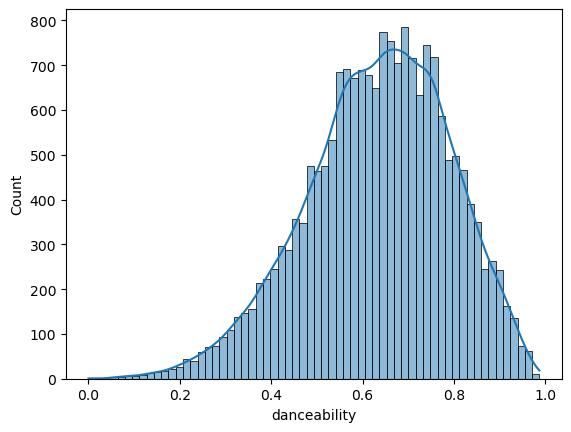

In [16]:
sns.histplot(df['danceability'],kde=True)
plt.show()

C:\Program Files\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


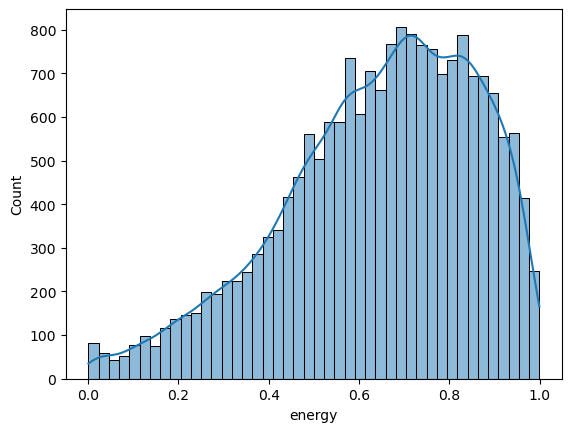

In [19]:
sns.histplot(df['energy'],kde=True)
plt.show()

C:\Program Files\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


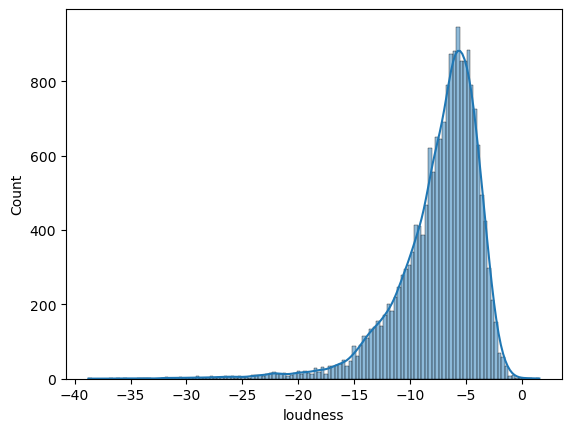

In [21]:
sns.histplot(df['loudness'],kde=True)
plt.show()

In [22]:
df.corr()

song_popularity  song_duration_ms  acousticness  \
song_popularity          1.000000         -0.018899     -0.065181   
song_duration_ms        -0.018899          1.000000     -0.097882   
acousticness            -0.065181         -0.097882      1.000000   
danceability             0.104290         -0.104985     -0.182500   
energy                   0.001365          0.092688     -0.662639   
instrumentalness        -0.130907         -0.015188      0.173098   
key                     -0.013160         -0.004615     -0.002025   
liveness                -0.038937          0.016086     -0.082537   
loudness                 0.099442          0.016469     -0.557744   
audio_mode              -0.004969         -0.026328      0.064100   
speechiness              0.021479         -0.083447     -0.093574   
tempo                   -0.022672          0.012791     -0.136421   
time_signature           0.034983          0.000264     -0.157177   
audio_valence           -0.052895         -0.063421     -0.121670   

                  danceability    energy  instrumentalness       key  \
song_popularity       0.104290  0.001365         -0.130907 -0.013160   
song_duration_ms     -0.104985  0.092688         -0.015188 -0.004615   
acousticness         -0.182500 -0.662639          0.173098 -0.002025   
danceability          1.000000  0.044373         -0.130483  0.007723   
energy                0.044373  1.000000         -0.205914  0.020416   
instrumentalness     -0.130483 -0.205914          1.000000 -0.009463   
key                   0.007723  0.020416         -0.009463  1.000000   
liveness             -0.090694  0.167143         -0.032887 -0.008193   
loudness              0.177639  0.755516         -0.390248  0.010452   
audio_mode           -0.106539 -0.051605         -0.014983 -0.169848   
speechiness           0.213728  0.062053         -0.081138  0.033639   
tempo                -0.121286  0.162448         -0.036934  0.003239   
time_signature        0.136391  0.146265         -0.069181 -0.008282   
audio_valence         0.332014  0.316742         -0.178570  0.025356   

                  liveness  loudness  audio_mode  speechiness     tempo  \
song_popularity  -0.038937  0.099442   -0.004969     0.021479 -0.022672   
song_duration_ms  0.016086  0.016469   -0.026328    -0.083447  0.012791   
acousticness     -0.082537 -0.557744    0.064100    -0.093574 -0.136421   
danceability     -0.090694  0.177639   -0.106539     0.213728 -0.121286   
energy            0.167143  0.755516   -0.051605     0.062053  0.162448   
instrumentalness -0.032887 -0.390248   -0.014983    -0.081138 -0.036934   
key              -0.008193  0.010452   -0.169848     0.033639  0.003239   
liveness          1.000000  0.102450   -0.001035     0.090845  0.031876   
loudness          0.102450  1.000000   -0.058506     0.078164  0.129938   
audio_mode       -0.001035 -0.058506    1.000000    -0.111627  0.020448   
speechiness       0.090845  0.078164   -0.111627     1.000000  0.071685   
tempo             0.031876  0.129938    0.020448     0.071685  1.000000   
time_signature    0.013289  0.119241   -0.024042     0.057162  0.003978   
audio_valence     0.013789  0.199696   -0.004558     0.011046  0.037667   

                  time_signature  audio_valence  
song_popularity         0.034983      -0.052895  
song_duration_ms        0.000264      -0.063421  
acousticness           -0.157177      -0.121670  
danceability            0.136391       0.332014  
energy                  0.146265       0.316742  
instrumentalness       -0.069181      -0.178570  
key                    -0.008282       0.025356  
liveness                0.013289       0.013789  
loudness                0.119241       0.199696  
audio_mode             -0.024042      -0.004558  
speechiness             0.057162       0.011046  
tempo                   0.003978       0.037667  
time_signature          1.000000       0.094670  
audio_valence           0.094670       1.000000

<Axes: >

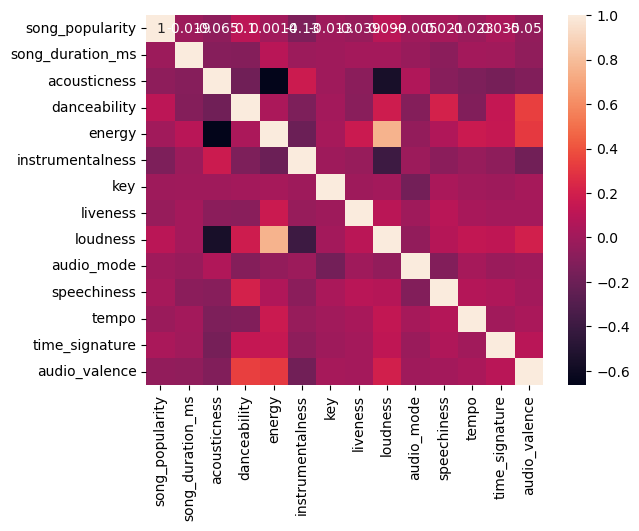

In [23]:
sns.heatmap(df.corr(),annot=True)

In [24]:
df.head()

song_popularity  song_duration_ms  acousticness  danceability  energy  \
0               73            262333      0.005520         0.496   0.682   
1               66            216933      0.010300         0.542   0.853   
2               76            231733      0.008170         0.737   0.463   
3               74            216933      0.026400         0.451   0.970   
4               56            223826      0.000954         0.447   0.766   

   instrumentalness  key  liveness  loudness  audio_mode  speechiness  \
0          0.000029    8    0.0589    -4.095           1       0.0294   
1          0.000000    3    0.1080    -6.407           0       0.0498   
2          0.447000    0    0.2550    -7.828           1       0.0792   
3          0.003550    0    0.1020    -4.938           1       0.1070   
4          0.000000   10    0.1130    -5.065           1       0.0313   

     tempo  time_signature  audio_valence  
0  167.060               4          0.474  
1  105.256               4          0.370  
2  123.881               4          0.324  
3  122.444               4          0.198  
4  172.011               4          0.574

<Axes: xlabel='song_duration_ms', ylabel='song_popularity'>

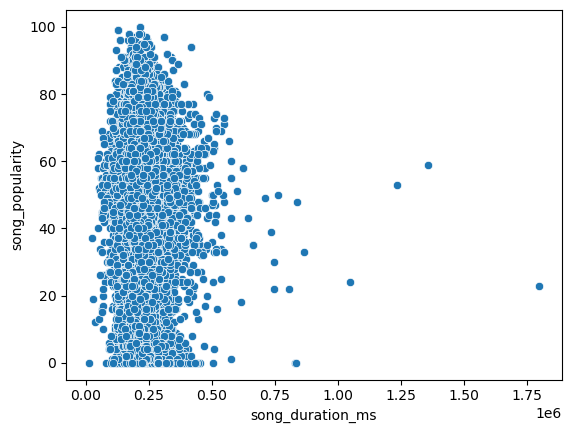

In [25]:
sns.scatterplot(x=df['song_duration_ms'],y=df['song_popularity'])

<Axes: xlabel='energy', ylabel='song_popularity'>

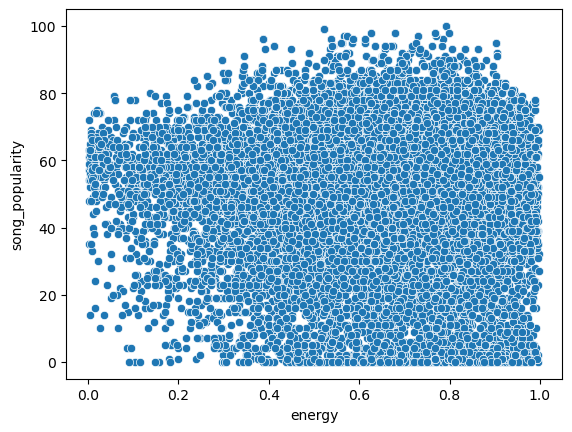

In [26]:
sns.scatterplot(x=df['energy'],y=df['song_popularity'])

<Axes: xlabel='tempo', ylabel='song_popularity'>

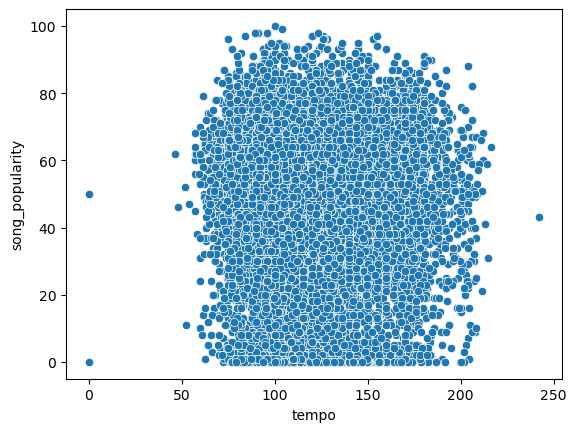

In [27]:
sns.scatterplot(x=df['tempo'],y=df['song_popularity'])

<Axes: xlabel='speechiness', ylabel='song_popularity'>

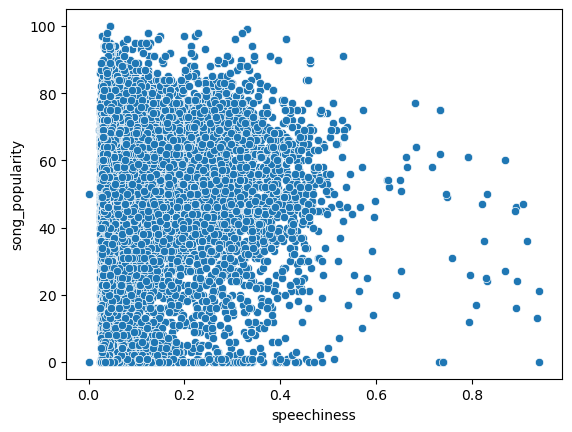

In [28]:
sns.scatterplot(x=df['speechiness'],y=df['song_popularity'])

<Axes: xlabel='loudness', ylabel='song_popularity'>

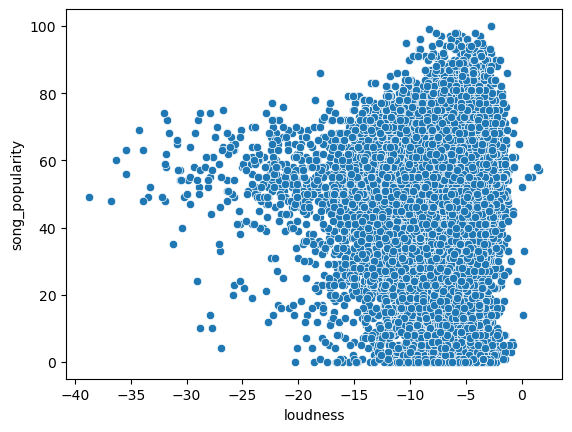

In [29]:
sns.scatterplot(x=df['loudness'],y=df['song_popularity'])

In [34]:
df.head()

song_popularity  song_duration_ms  acousticness  danceability  energy  \
0               73            262333      0.005520         0.496   0.682   
1               66            216933      0.010300         0.542   0.853   
2               76            231733      0.008170         0.737   0.463   
3               74            216933      0.026400         0.451   0.970   
4               56            223826      0.000954         0.447   0.766   

   instrumentalness  key  liveness  loudness  audio_mode  speechiness  \
0          0.000029    8    0.0589    -4.095           1       0.0294   
1          0.000000    3    0.1080    -6.407           0       0.0498   
2          0.447000    0    0.2550    -7.828           1       0.0792   
3          0.003550    0    0.1020    -4.938           1       0.1070   
4          0.000000   10    0.1130    -5.065           1       0.0313   

     tempo  time_signature  audio_valence  
0  167.060               4          0.474  
1  105.256               4          0.370  
2  123.881               4          0.324  
3  122.444               4          0.198  
4  172.011               4          0.574

In [32]:
df['loudness']

0        -4.095
1        -6.407
2        -7.828
3        -4.938
4        -5.065
          ...  
18830   -16.107
18831   -14.078
18832   -12.222
18833   -12.020
18834   -11.790
Name: loudness, Length: 18835, dtype: float64

C:\Program Files\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Program Files\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Program Files\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Program Files\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

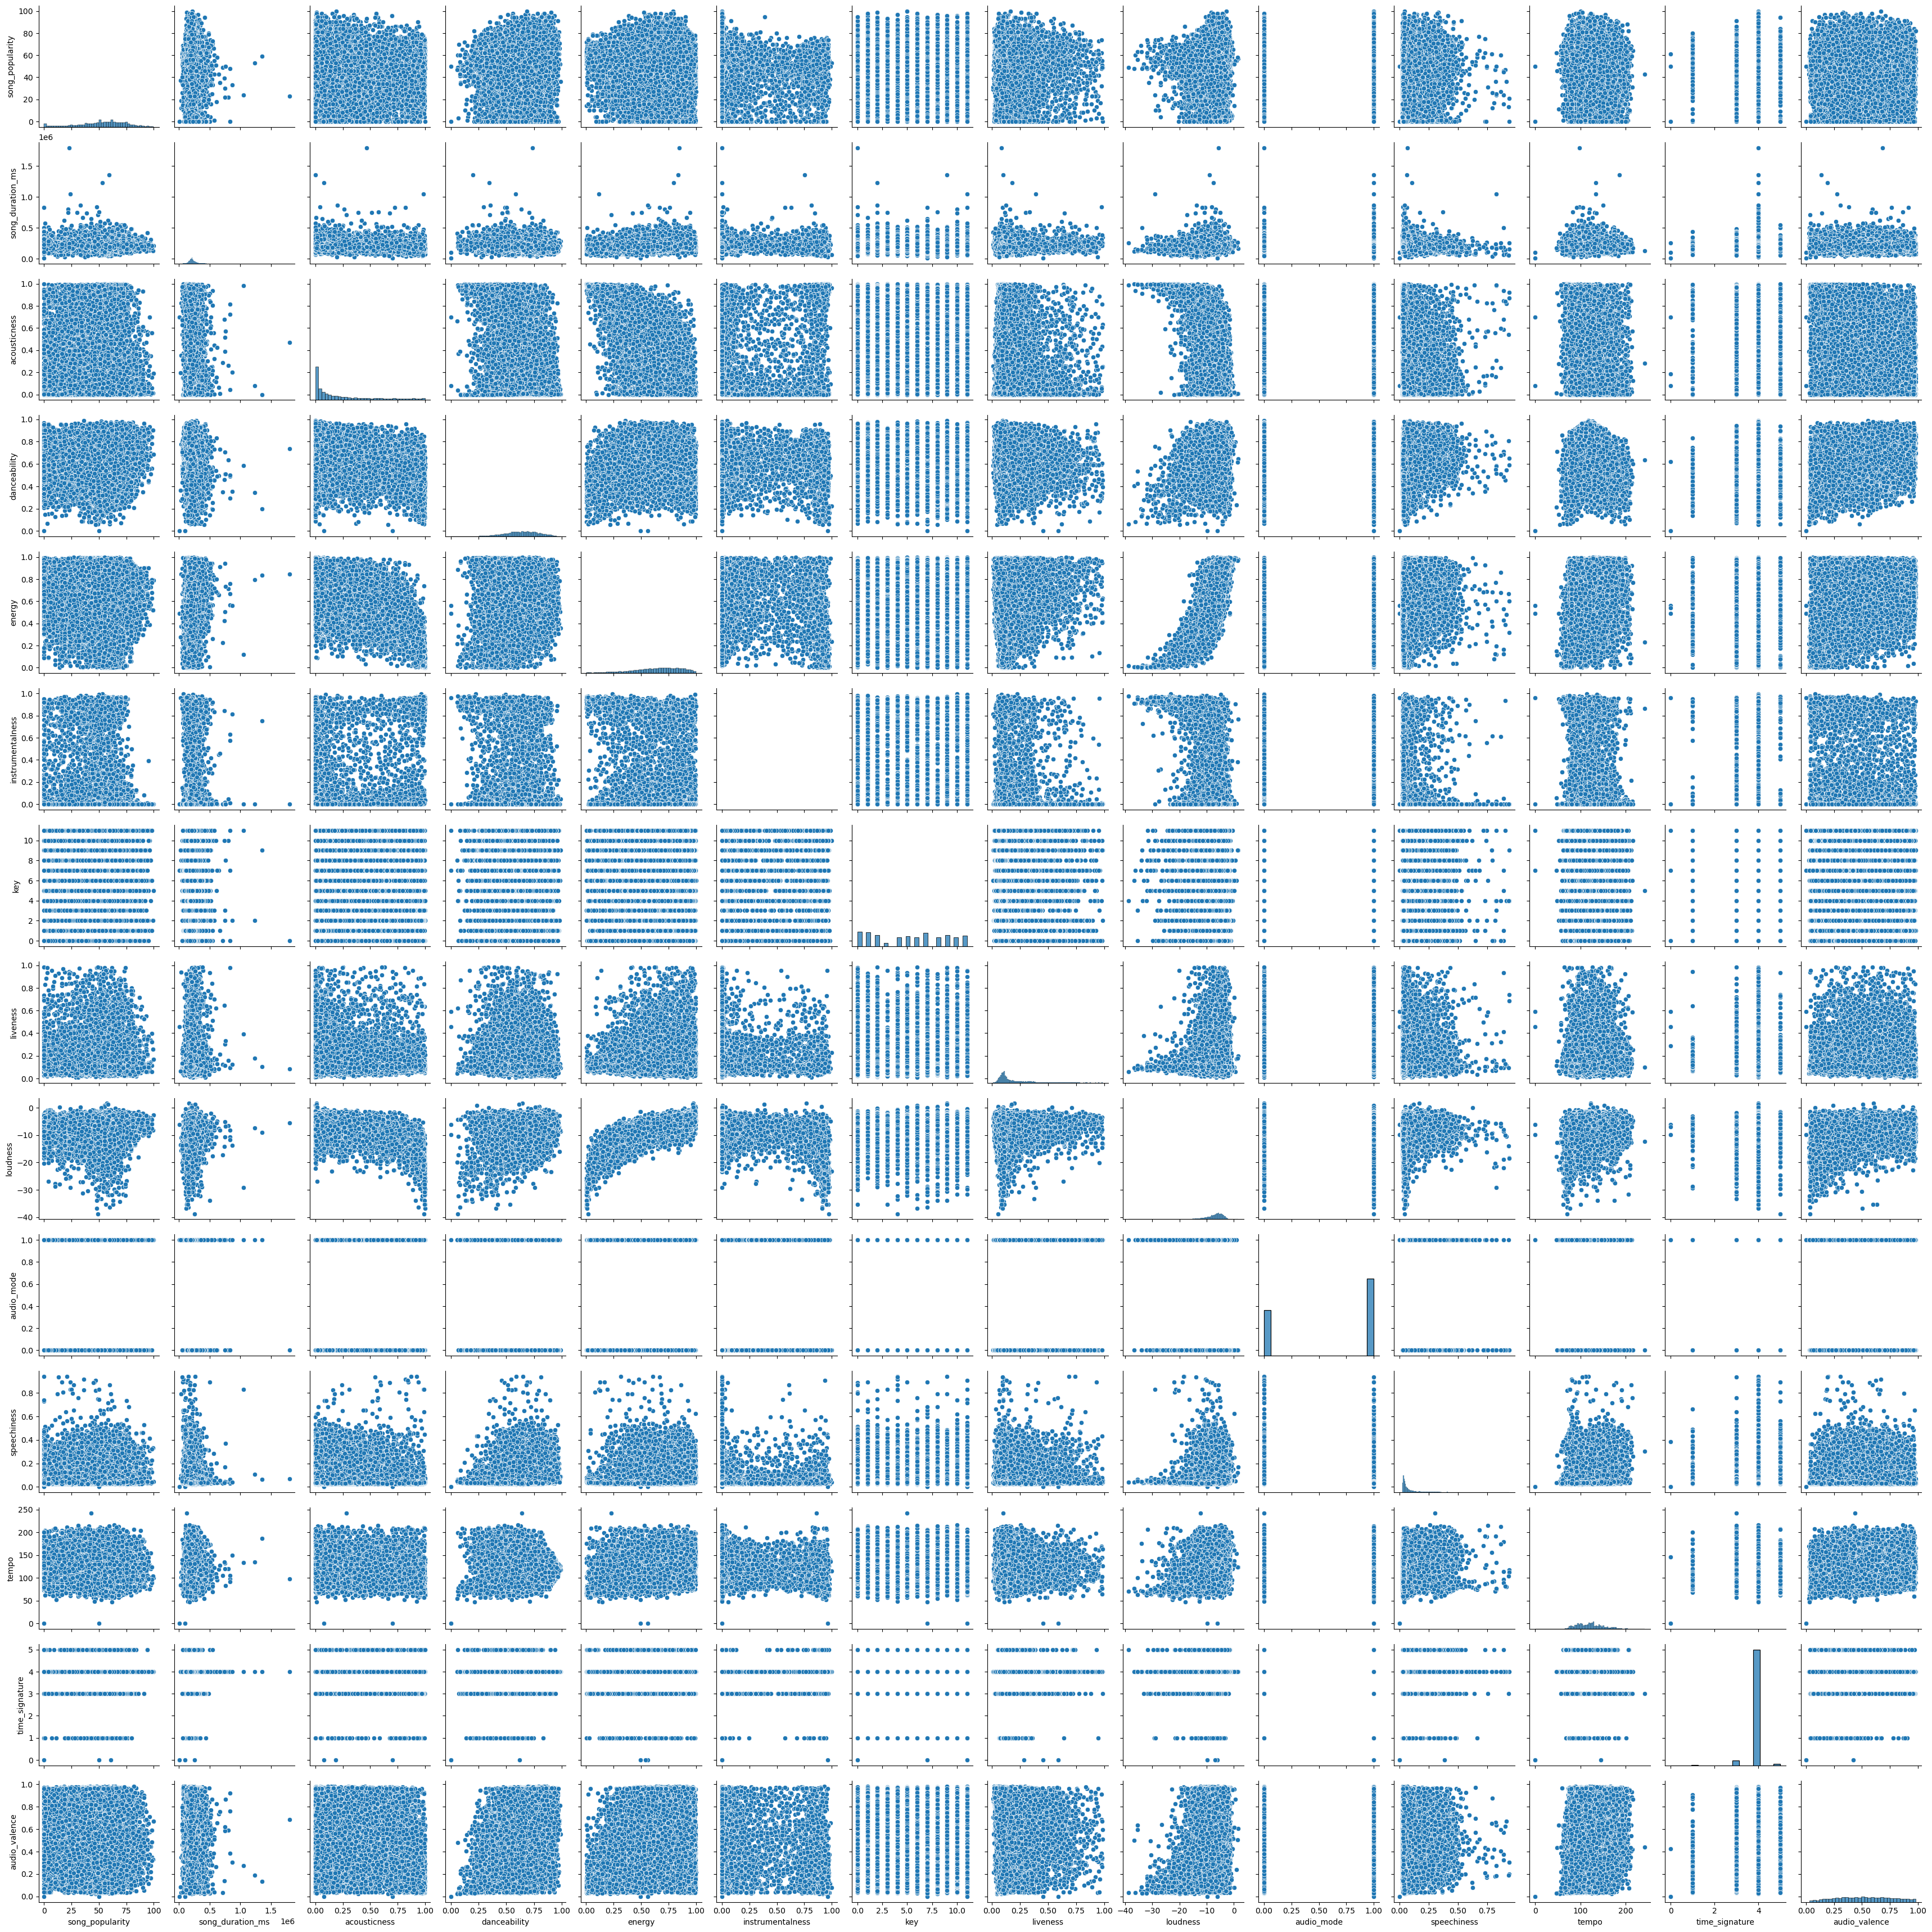

In [35]:
sns.pairplot(df)

In [37]:
df.head()

song_popularity  song_duration_ms  acousticness  danceability  energy  \
0               73            262333      0.005520         0.496   0.682   
1               66            216933      0.010300         0.542   0.853   
2               76            231733      0.008170         0.737   0.463   
3               74            216933      0.026400         0.451   0.970   
4               56            223826      0.000954         0.447   0.766   

   instrumentalness  key  liveness  loudness  audio_mode  speechiness  \
0          0.000029    8    0.0589    -4.095           1       0.0294   
1          0.000000    3    0.1080    -6.407           0       0.0498   
2          0.447000    0    0.2550    -7.828           1       0.0792   
3          0.003550    0    0.1020    -4.938           1       0.1070   
4          0.000000   10    0.1130    -5.065           1       0.0313   

     tempo  time_signature  audio_valence  
0  167.060               4          0.474  
1  105.256               4          0.370  
2  123.881               4          0.324  
3  122.444               4          0.198  
4  172.011               4          0.574

In [39]:
df['popularity/yes/no']=df['song_popularity'].apply(lambda x:1 if x>60 else 0)

In [40]:
df

song_popularity  song_duration_ms  acousticness  danceability  energy  \
0                   73            262333      0.005520         0.496   0.682   
1                   66            216933      0.010300         0.542   0.853   
2                   76            231733      0.008170         0.737   0.463   
3                   74            216933      0.026400         0.451   0.970   
4                   56            223826      0.000954         0.447   0.766   
...                ...               ...           ...           ...     ...   
18830               60            159645      0.893000         0.500   0.151   
18831               60            205666      0.765000         0.495   0.161   
18832               23            182211      0.847000         0.719   0.325   
18833               55            352280      0.945000         0.488   0.326   
18834               60            193533      0.911000         0.640   0.381   

       instrumentalness  key  liveness  loudness  audio_mode  speechiness  \
0              0.000029    8    0.0589    -4.095           1       0.0294   
1              0.000000    3    0.1080    -6.407           0       0.0498   
2              0.447000    0    0.2550    -7.828           1       0.0792   
3              0.003550    0    0.1020    -4.938           1       0.1070   
4              0.000000   10    0.1130    -5.065           1       0.0313   
...                 ...  ...       ...       ...         ...          ...   
18830          0.000065   11    0.1110   -16.107           1       0.0348   
18831          0.000001   11    0.1050   -14.078           0       0.0301   
18832          0.000000    0    0.1250   -12.222           1       0.0355   
18833          0.015700    3    0.1190   -12.020           1       0.0328   
18834          0.000254    4    0.1040   -11.790           1       0.0302   

         tempo  time_signature  audio_valence  popularity/yes/no  
0      167.060               4          0.474                  1  
1      105.256               4          0.370                  1  
2      123.881               4          0.324                  1  
3      122.444               4          0.198                  1  
4      172.011               4          0.574                  0  
...        ...             ...            ...                ...  
18830  113.969               4          0.300                  0  
18831   94.286               4          0.265                  0  
18832  130.534               4          0.286                  0  
18833  106.063               4          0.323                  0  
18834   91.490               4          0.581                  0  

[18835 rows x 15 columns]

0        -2.583596
1        -4.042271
2        -4.938801
3        -3.115457
4        -3.195584
           ...    
18830   -10.162145
18831    -8.882019
18832    -7.711041
18833    -7.583596
18834    -7.438486
Name: loudness, Length: 18835, dtype: float64

In [48]:
scaler=MinMaxScaler(
)

In [54]:
df[['tempo','loudness','energy']]=scaler.fit_transform(df[['tempo','loudness','energy']])

In [56]:
scaler.fit_transform(df[['tempo','loudness','energy']])

array([[0.68942464, 0.85924219, 0.68234245],
       [0.43437136, 0.80194781, 0.85369715],
       [0.51123317, 0.76673358, 0.46288818],
       ...,
       [0.53868883, 0.65784452, 0.32460193],
       [0.4377017 , 0.66285035, 0.325604  ],
       [0.37756172, 0.66855005, 0.38071809]])

In [57]:
df.head()

song_popularity  song_duration_ms  acousticness  danceability    energy  \
0               73            262333      0.005520         0.496  0.682342   
1               66            216933      0.010300         0.542  0.853697   
2               76            231733      0.008170         0.737  0.462888   
3               74            216933      0.026400         0.451  0.970940   
4               56            223826      0.000954         0.447  0.766517   

   instrumentalness  key  liveness  loudness  audio_mode  speechiness  \
0          0.000029    8    0.0589  0.859242           1       0.0294   
1          0.000000    3    0.1080  0.801948           0       0.0498   
2          0.447000    0    0.2550  0.766734           1       0.0792   
3          0.003550    0    0.1020  0.838352           1       0.1070   
4          0.000000   10    0.1130  0.835204           1       0.0313   

      tempo  time_signature  audio_valence  popularity/yes/no  
0  0.689425               4          0.474                  1  
1  0.434371               4          0.370                  1  
2  0.511233               4          0.324                  1  
3  0.505303               4          0.198                  1  
4  0.709856               4          0.574                  0

In [ ]:
df=df.drop('song_popularity',axis=1)

In [68]:
x=df.drop('popularity/yes/no',axis=1).values

In [69]:
y=df['popularity/yes/no'].values

In [70]:
x

array([[2.62333000e+05, 5.52000000e-03, 4.96000000e-01, ...,
        6.89424640e-01, 4.00000000e+00, 4.74000000e-01],
       [2.16933000e+05, 1.03000000e-02, 5.42000000e-01, ...,
        4.34371363e-01, 4.00000000e+00, 3.70000000e-01],
       [2.31733000e+05, 8.17000000e-03, 7.37000000e-01, ...,
        5.11233173e-01, 4.00000000e+00, 3.24000000e-01],
       ...,
       [1.82211000e+05, 8.47000000e-01, 7.19000000e-01, ...,
        5.38688830e-01, 4.00000000e+00, 2.86000000e-01],
       [3.52280000e+05, 9.45000000e-01, 4.88000000e-01, ...,
        4.37701698e-01, 4.00000000e+00, 3.23000000e-01],
       [1.93533000e+05, 9.11000000e-01, 6.40000000e-01, ...,
        3.77561716e-01, 4.00000000e+00, 5.81000000e-01]])

In [71]:
y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [75]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [77]:
x_train.shape

(15068, 13)

In [78]:
y_train.shape

(15068,)

In [79]:
lr=LogisticRegression()

In [80]:
lr.fit(x_train,y_train)

LogisticRegression()

In [81]:
lr.score(x_test,y_test)

0.6023360764534113

In [82]:
lr.score(x_train,y_train)

0.5925139368197505

In [83]:
confusion_matrix(y_test,lr.predict(x_test))

array([[2269,    0],
       [1498,    0]], dtype=int64)

In [85]:
precision_score(y_test,lr.predict(x_test))

C:\Program Files\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

In [86]:
recall_score(y_test,lr.predict(x_test))

0.0

In [88]:
print(classification_report(y_test,lr.predict(x_test)))

              precision    recall  f1-score   support

           0       0.60      1.00      0.75      2269
           1       0.00      0.00      0.00      1498

    accuracy                           0.60      3767
   macro avg       0.30      0.50      0.38      3767
weighted avg       0.36      0.60      0.45      3767



C:\Program Files\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Program Files\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Program Files\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [139]:
dt=DecisionTreeClassifier(max_depth=8)

In [140]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=8)

In [141]:
dt.score(x_test,y_test)

0.6461375099548713

In [142]:
dt.score(x_train,y_train)

0.6841651181311388

In [143]:
confusion_matrix(y_test,dt.predict(x_test))

array([[1772,  497],
       [ 836,  662]], dtype=int64)

In [214]:
rf=RandomForestClassifier(n_estimators=100,max_depth=8,random_state=42,max_leaf_nodes=25)

In [215]:
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=8, max_leaf_nodes=25, random_state=42)

In [216]:
rf.score(x_train,y_train)

0.657419697371914

In [217]:
rf.score(x_test,y_test)

0.64719936288824

In [218]:
confusion_matrix(y_test,rf.predict(x_test))

array([[1977,  292],
       [1037,  461]], dtype=int64)

In [246]:
svm=SVC()

In [247]:
svm.fit(x_train,y_train)

SVC()

In [249]:
svm.score(x_test,y_test)

0.6023360764534113

In [250]:
svm.score(x_train,y_train)

0.5925139368197505

In [251]:
confusion_matrix(y_test,svm.predict(x_test))

array([[2269,    0],
       [1498,    0]], dtype=int64)

In [287]:
knn=KNeighborsClassifier(n_neighbors=11)

In [288]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=11)

In [289]:
knn.score(x_test,y_test)

0.6169365542872313

In [290]:
knn.score(x_train,y_train)

0.6898725776479957

In [291]:
confusion_matrix(y_test,knn.predict(x_test))

array([[1642,  627],
       [ 816,  682]], dtype=int64)

In [292]:
vt=VotingClassifier(estimators=[('lr',lr),('dt',dt),('rf',rf),('svm',svm),('knn',knn)])

In [293]:
vt.fit(x_train,y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('dt', DecisionTreeClassifier(max_depth=8)),
                             ('rf',
                              RandomForestClassifier(max_depth=8,
                                                     max_leaf_nodes=25,
                                                     random_state=42)),
                             ('svm', SVC()),
                             ('knn', KNeighborsClassifier(n_neighbors=11))])

In [294]:
rf.score(x_test,y_test)

0.64719936288824

In [295]:
rf.score(x_train,y_train)

0.657419697371914

In [296]:
confusion_matrix(y_test,vt.predict(x_test))

array([[2205,   64],
       [1289,  209]], dtype=int64)

In [297]:
print(classification_report(y_test,vt.predict(x_test)))

              precision    recall  f1-score   support

           0       0.63      0.97      0.77      2269
           1       0.77      0.14      0.24      1498

    accuracy                           0.64      3767
   macro avg       0.70      0.56      0.50      3767
weighted avg       0.68      0.64      0.55      3767



In [303]:
ada=AdaBoostClassifier(n_estimators=100)

In [304]:
ada.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=100)

In [305]:
ada.score(x_test,y_test)

0.6373772232545792